In [0]:
#!pip install Gudiya==0.1.1.4
#!pip install pytorch-gradcam

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:

import Model as Md
from TrainTestandUtils import TrainTestandUtils as Tt

In [0]:
#!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

In [0]:

from Albumentations import album_compose
from GradCAM import GradCAM
from Utils import *

In [0]:
a =album_compose()

In [7]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=a)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [0]:
model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=20,
               input_size=(3,32,32),
               classes=classes)

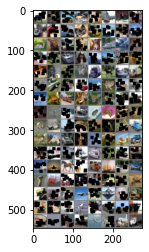

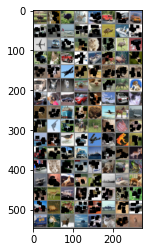

In [22]:
new_model.plot_train_images()

In [23]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [24]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.3996524810791016 Batch_id=390 Accuracy=41.29: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0101, Accuracy: 5360/10000 (53.60%)

EPOCH  2


Loss=1.2239911556243896 Batch_id=390 Accuracy=53.72: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 6190/10000 (61.90%)

EPOCH  3


Loss=0.7885178327560425 Batch_id=390 Accuracy=61.83: 100%|██████████| 391/391 [00:39<00:00,  9.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0071, Accuracy: 6897/10000 (68.97%)

EPOCH  4


Loss=0.7327619791030884 Batch_id=390 Accuracy=67.66: 100%|██████████| 391/391 [00:39<00:00,  9.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 7291/10000 (72.91%)

EPOCH  5


Loss=0.6120991706848145 Batch_id=390 Accuracy=72.24: 100%|██████████| 391/391 [00:39<00:00,  9.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0062, Accuracy: 7436/10000 (74.36%)

EPOCH  6


Loss=0.588360607624054 Batch_id=390 Accuracy=74.85: 100%|██████████| 391/391 [00:39<00:00,  9.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0053, Accuracy: 7671/10000 (76.71%)

EPOCH  7


Loss=0.569966197013855 Batch_id=390 Accuracy=77.47: 100%|██████████| 391/391 [00:39<00:00,  9.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0043, Accuracy: 8131/10000 (81.31%)

EPOCH  8


Loss=0.5575762987136841 Batch_id=390 Accuracy=78.85: 100%|██████████| 391/391 [00:40<00:00,  9.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8182/10000 (81.82%)

EPOCH  9


Loss=0.45489174127578735 Batch_id=390 Accuracy=80.49: 100%|██████████| 391/391 [00:40<00:00,  9.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0039, Accuracy: 8318/10000 (83.18%)

EPOCH  10


Loss=0.5403215289115906 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:41<00:00,  9.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8185/10000 (81.85%)

EPOCH  11


Loss=0.6892329454421997 Batch_id=390 Accuracy=82.57: 100%|██████████| 391/391 [00:40<00:00,  9.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8215/10000 (82.15%)

EPOCH  12


Loss=0.3867281675338745 Batch_id=390 Accuracy=83.43: 100%|██████████| 391/391 [00:40<00:00,  9.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8501/10000 (85.01%)

EPOCH  13


Loss=0.5564826130867004 Batch_id=390 Accuracy=84.41: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8549/10000 (85.49%)

EPOCH  14


Loss=0.4668610095977783 Batch_id=390 Accuracy=85.87: 100%|██████████| 391/391 [00:39<00:00,  9.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8619/10000 (86.19%)

EPOCH  15


Loss=0.578406810760498 Batch_id=390 Accuracy=87.13: 100%|██████████| 391/391 [00:39<00:00,  9.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 8706/10000 (87.06%)

EPOCH  16


Loss=0.35820260643959045 Batch_id=390 Accuracy=88.55: 100%|██████████| 391/391 [00:39<00:00,  9.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0027, Accuracy: 8867/10000 (88.67%)

EPOCH  17


Loss=0.29338347911834717 Batch_id=390 Accuracy=90.81: 100%|██████████| 391/391 [00:40<00:00,  9.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9020/10000 (90.20%)

EPOCH  18


Loss=0.1011529192328453 Batch_id=390 Accuracy=92.46: 100%|██████████| 391/391 [00:39<00:00,  9.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0022, Accuracy: 9105/10000 (91.05%)

EPOCH  19


Loss=0.20414045453071594 Batch_id=390 Accuracy=93.54: 100%|██████████| 391/391 [00:39<00:00,  9.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0021, Accuracy: 9157/10000 (91.57%)

EPOCH  20


Loss=0.24233058094978333 Batch_id=390 Accuracy=93.90: 100%|██████████| 391/391 [00:39<00:00,  9.82it/s]


Test set: Average loss: 0.0021, Accuracy: 9153/10000 (91.53%)



In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [0]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
from Utils import change, visualize_cam, imshow, plot_images

trans = transforms.ToPILImage()
pil_img=trans(torchvision.utils.make_grid(images[1]))



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


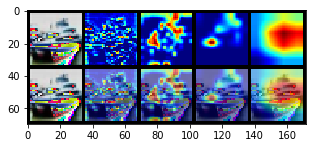

In [27]:


torch_img,normed_torch_img=change(pil_img,device)
plot_images(torch_img,normed_torch_img, model)



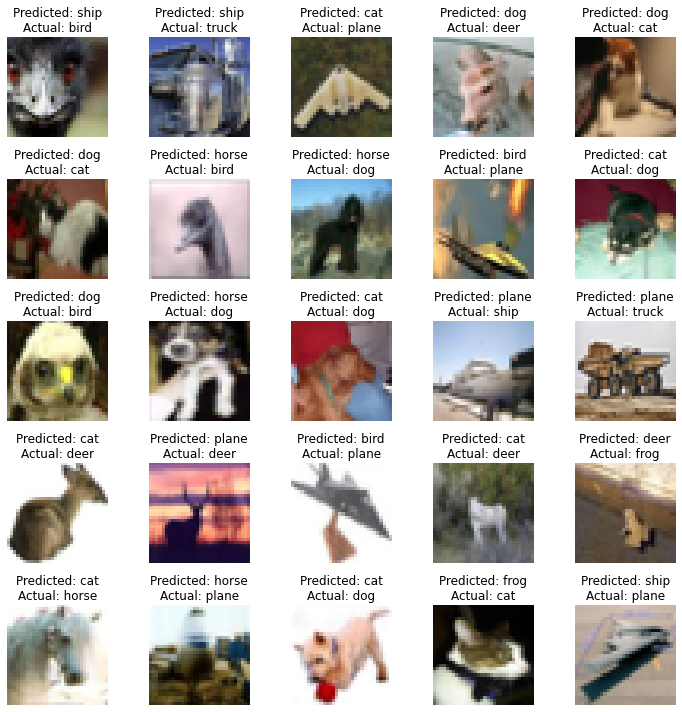

In [28]:
new_model.plot_misclassified('mis.jpg')

In [29]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 91 %


In [30]:
new_model.classwise_acc()


Accuracy of plane : 89 %
Accuracy of   car : 100 %
Accuracy of  bird : 87 %
Accuracy of   cat : 82 %
Accuracy of  deer : 92 %
Accuracy of   dog : 84 %
Accuracy of  frog : 86 %
Accuracy of horse : 92 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %



Length of train acc is 20
Length of test acc is 20


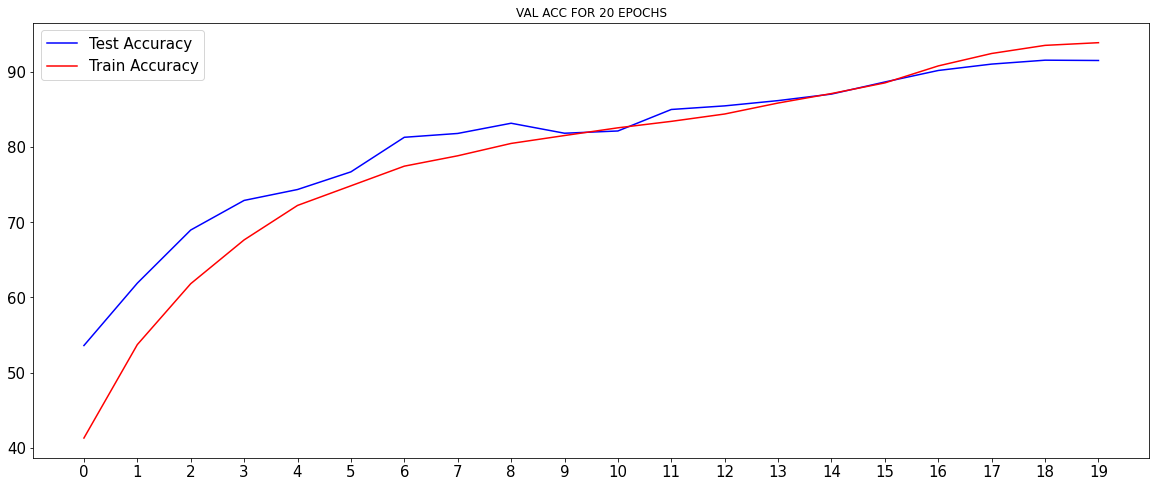

In [31]:
new_model.plot_train_test_acc()